In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
import seaborn as sns
import api_keys

from citipy import citipy

lat_range = (-90, 90)
lng_range = (-180, 180)

In [27]:
latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

latitude_and_Longitude = tuple(zip(latitude,longitude))

In [28]:
cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [29]:
df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

len(cities)

2000

In [30]:
api_key = api_keys.api_key
for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    
    country_info = requests.get(api_url).json()
    
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

http://api.openweathermap.org/data/2.5/forecast?q=bria,cf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=gao,ml&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb


/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

http://api.openweathermap.org/data/2.5/forecast?q=atar,mr&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ivanovo,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=pocone,br&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=varhaug,no&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb

/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a f

http://api.openweathermap.org/data/2.5/forecast?q=maceio,br&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mahebourg,mu&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=keuruu,fi&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=fortuna,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=cayenne,gf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=saint george,bm&units=IMPERIAL&mode=jso

http://api.openweathermap.org/data/2.5/forecast?q=sturgeon falls,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=torbay,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=birjand,ir&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=dikson,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=klaksvik,fo&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=manta,ec&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=aswan,eg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=aranos,na&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb

http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=grindavik,is&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=honiara,sb&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=buala,sb&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d6

http://api.openweathermap.org/data/2.5/forecast?q=hambantota,lk&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=puerto ayora,ec&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=neiafu,to&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bandarbeyla,so&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=zhigansk,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a7

http://api.openweathermap.org/data/2.5/forecast?q=panzhihua,cn&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=teya,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ketchikan,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=constitucion,mx&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=messini,gr&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bontang,id&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ambanja,mg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182

http://api.openweathermap.org/data/2.5/forecast?q=isangel,vu&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=provideniya,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=magaria,ne&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=thompson,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d

http://api.openweathermap.org/data/2.5/forecast?q=namatanai,pg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=pangnirtung,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=muravlenko,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=eureka,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mokhotlong,ls&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=oksfjord,no&units=IMPERIAL&mod

http://api.openweathermap.org/data/2.5/forecast?q=tyubuk,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=los llanos de aridane,es&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=saint-philippe,re&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=marzuq,ly&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=qaanaaq,gl&units=IMPE

http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=barawe,so&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=manyana,bw&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=puerto escondido,mx&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bethel,us&units=IMPERIAL&m

http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port elizabeth,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=andenes,no&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=barentsburg,sj&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=kamaishi,jp&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kapustin yar,ru&units=IMPE

http://api.openweathermap.org/data/2.5/forecast?q=wanning,cn&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=guerrero negro,mx&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=cidreira,br&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kieta,pg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=la rioja,ar&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=lebu,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e161

http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=guanare,ve&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hithadhoo,mv&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=upernavik,gl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port hardy,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bethel,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=nehe,cn&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d6

http://api.openweathermap.org/data/2.5/forecast?q=ponta do sol,cv&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=dikson,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d1

http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=raudeberg,no&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=provideniya,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=new norfolk,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=wanxian,cn&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tigil,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e1618

http://api.openweathermap.org/data/2.5/forecast?q=nhulunbuy,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=torbay,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=madinat sittah uktubar,eg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bethel,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=attawapiskat,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=luena,ao&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=paradwip,in&units=IMPER

http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tamandare,br&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kangaatsiaq,gl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=norman wells,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=saskylakh,ru&units=IMPE

http://api.openweathermap.org/data/2.5/forecast?q=alyangula,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=luderitz,na&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hasaki,jp&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=sudak,ua&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=baruun-urt,mn&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=sao joao da barra,br&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18

http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port lincoln,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=la sarre,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=chiang rai,th&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port augusta,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=sambava,mg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kahului,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a

http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ribeira grande,pt&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=taoudenni,ml&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=nantucket,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=carbonia,it&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=vavuniya,lk&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=liwale,tz&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a7

http://api.openweathermap.org/data/2.5/forecast?q=ambanja,mg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hithadhoo,mv&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=pochutla,mx&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=belushya guba,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=natitingou,bj&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=saint-joseph,re&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=aklavik,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=alihe,cn&units=IMPERIAL

http://api.openweathermap.org/data/2.5/forecast?q=fairbanks,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=puerto ayora,ec&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=dzhebariki-khaya,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=huilong,cn&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=camocim,br&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75

http://api.openweathermap.org/data/2.5/forecast?q=talaya,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=victoria,sc&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port elizabeth,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bengkulu,id&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=namibe,ao&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?

http://api.openweathermap.org/data/2.5/forecast?q=bambous virieux,mu&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kodino,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=aguada de pasajeros,cu&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=vaini,to&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d

http://api.openweathermap.org/data/2.5/forecast?q=faanui,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=yeppoon,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mount gambier,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=pacific grove,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=sentyabrskiy,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=longyearbyen,sj&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IM

http://api.openweathermap.org/data/2.5/forecast?q=sitrah,bh&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=thompson,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=balud,ph&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=sobinka,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=barrow,us&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=monrovia,lr&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
h

http://api.openweathermap.org/data/2.5/forecast?q=arawa,pg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=upernavik,gl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=padang,id&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=naze,jp&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=beringovskiy,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=airai,pw&units=IMPERIAL&mode=json&A

http://api.openweathermap.org/data/2.5/forecast?q=sivaki,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=lagoa,pt&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=quatre cocos,mu&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mahebourg,mu&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=narsaq,gl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=nanortalik,gl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=nurota,uz&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=grand river south east,mu&units=IMPERIAL&mode=json&APPID=cbc453f4a7f19

http://api.openweathermap.org/data/2.5/forecast?q=sumbawa,id&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tanout,ne&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=faanui,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port elizabeth,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=butaritari,ki&units=IMPERIAL&mode

http://api.openweathermap.org/data/2.5/forecast?q=pangkalanbuun,id&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=san benito,ph&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=concordia,br&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=port elizabeth,za&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMP

http://api.openweathermap.org/data/2.5/forecast?q=lamovita,ba&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=high level,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=norman wells,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=vardo,no&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&

http://api.openweathermap.org/data/2.5/forecast?q=mount gambier,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=samarai,pg&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=geraldton,ca&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=hasaki,jp&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=vila franca do campo,pt&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=cbc453f4a7f1950d18a75e16182d65cb
http://api.openweathermap.org/data/2.5/forecast?q=arraial do cabo,br&units=IMPERIAL&mode=json&APPID=cb

In [31]:
df_countries.to_csv("Solution.csv")

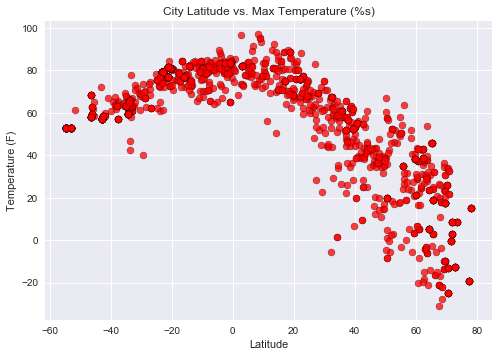

In [32]:
x_axis = df_countries["Latitude"]
data = df_countries["Temperature (F)"]

plt.style.use('seaborn')
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (%s)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

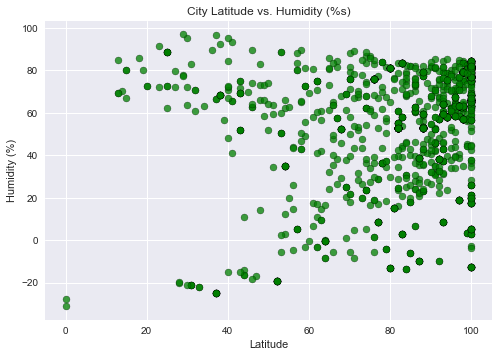

In [33]:
x_axis = df_countries["Humidity (%)"]
data = df_countries["Temperature (F)"]

plt.style.use('seaborn')
plt.scatter(x_axis, data, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (%s)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()


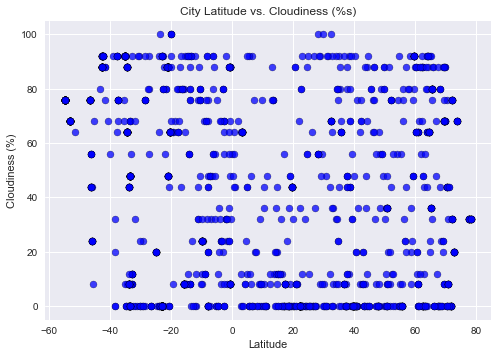

In [34]:
x_axis = df_countries["Latitude"]
data = df_countries["Cloudiness (%)"]

plt.style.use('seaborn')
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (%s)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

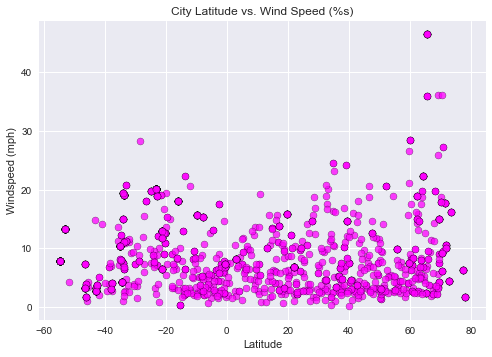

In [35]:
x_axis = df_countries["Latitude"]
data = df_countries["Wind Speed (mph)"]

plt.style.use('seaborn')
plt.scatter(x_axis, data, marker="o", facecolors="magenta", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (%s)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.show()